# Ridge Regression Model

In [101]:
#imports
from pathlib import Path
import hvplot.pandas
import matplotlib
import pandas as pd
import numpy as np


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA

In [103]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [104]:
# date to split the data
# we use this date as the point where we want to use the model to predict
split_date = "2022-01-01"

In [105]:
#read in the data from a CSV file 
dataframe = pd.read_csv(Path("./combined_data_shifted_time.csv"), index_col= "Date", parse_dates= True).dropna()
dataframe.tail()

,Jets_Shifted,Oil,USD,Cheap,Flights,Best airlines,Travel,luggage,luggage weight,suitcase,carry on,precheck,RV,train,bus,car,road,Jets
Date,,,,,,,,,,,,,,,,,,
2022-12-23,-1.338432,0.576896,1.681854,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096,-1.377802
2022-12-27,-1.386750,0.637598,1.685902,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096,-1.417171
2022-12-28,-1.374223,0.655756,1.534131,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096,-1.490542
2022-12-29,-1.333064,0.780271,1.572581,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096,-1.411803
2022-12-30,-1.399276,0.770932,1.627217,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096,-1.404645


In [106]:
#split the data into the X training 
X_train = dataframe.loc[dataframe.index<split_date].copy()
X_train.drop("Jets", axis=1, inplace=True)
X_train.tail()


,Jets_Shifted,Oil,USD,Cheap,Flights,Best airlines,Travel,luggage,luggage weight,suitcase,carry on,precheck,RV,train,bus,car,road
Date,,,,,,,,,,,,,,,,,
2021-12-27,-0.900586,0.383690,0.036655,-0.874344,-0.629192,0.0,3.307819,-0.645728,-0.160073,-0.318914,-0.223704,0.118646,0.313112,-0.768987,-0.585775,-0.883593,-0.574096
2021-12-28,-0.907697,0.267372,0.032608,-0.874344,-0.629192,0.0,3.307819,-0.645728,-0.160073,-0.318914,-0.223704,0.118646,0.313112,-0.768987,-0.585775,-0.883593,-0.574096
2021-12-29,-0.721046,0.401538,0.020466,-0.874344,-0.629192,0.0,3.307819,-0.645728,-0.160073,-0.318914,-0.223704,0.118646,0.313112,-0.768987,-0.585775,-0.883593,-0.574096
2021-12-30,-0.694383,0.486623,-0.062502,-0.874344,-0.629192,0.0,3.307819,-0.645728,-0.160073,-0.318914,-0.223704,0.118646,0.313112,-0.768987,-0.585775,-0.883593,-0.574096
2021-12-31,-0.635149,0.540061,-0.074645,-0.874344,-0.629192,0.0,3.307819,-0.645728,-0.160073,-0.318914,-0.223704,0.118646,0.313112,-0.768987,-0.585775,-0.883593,-0.574096


In [107]:
#split the data into the y training 
y_train = dataframe.loc[dataframe.index< split_date,['Jets']]
y_train.tail()

,Jets
Date,
2021-12-27,-0.642307
2021-12-28,-0.620833
2021-12-29,-0.678098
2021-12-30,-0.679888
2021-12-31,-0.687045


In [108]:
#split the data into the X test, this is the full dataset without the y variable
X_test = dataframe.copy()
X_test.drop("Jets", axis=1, inplace=True)
X_test.tail()


,Jets_Shifted,Oil,USD,Cheap,Flights,Best airlines,Travel,luggage,luggage weight,suitcase,carry on,precheck,RV,train,bus,car,road
Date,,,,,,,,,,,,,,,,,
2022-12-23,-1.338432,0.576896,1.681854,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096
2022-12-27,-1.386750,0.637598,1.685902,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096
2022-12-28,-1.374223,0.655756,1.534131,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096
2022-12-29,-1.333064,0.780271,1.572581,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096
2022-12-30,-1.399276,0.770932,1.627217,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096


In [109]:
#split the data into the y test, this is the y-variable for the full timespan 
y_test = dataframe.loc[:,['Jets']]
y_test.tail()

,Jets
Date,
2022-12-23,-1.377802
2022-12-27,-1.417171
2022-12-28,-1.490542
2022-12-29,-1.411803
2022-12-30,-1.404645


In [110]:
#Creating the PCA model 
pca=PCA(n_components=5)

In [111]:
# Fit the PCA model on the transformed credit card DataFrame
X_train_data_pca = pca.fit_transform(X_train)

# Review the first 5 rows of the array of list data
X_train_data_pca[:5]

array([[-3.72569086,  0.42111677,  0.19035206,  1.16558329,  0.4967935 ],
       [-3.7341199 ,  0.41799424,  0.13664795,  1.1837705 ,  0.45963841],
       [-3.73437924,  0.42657939,  0.14862538,  1.18267371,  0.46402288],
       [-3.7328994 ,  0.40586388,  0.12361793,  1.18423464,  0.45636414],
       [-3.73991454,  0.4582383 ,  0.15738508,  1.1940835 ,  0.45564936]])

In [112]:
#looking at the PCA explained variance
pca.explained_variance_ratio_
sum(pca.explained_variance_ratio_)

0.9388850095331702

The explained variance is good 93% of the data's is explained using the is PCA


In [113]:
# Create the PCA DataFrame
X_train_data_pca_df = pd.DataFrame(
    X_train_data_pca,
    columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5"]
)

# Review the PCA DataFrame
X_train_data_pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5
0,-3.725691,0.421117,0.190352,1.165583,0.496794
1,-3.734120,0.417994,0.136648,1.183771,0.459638
2,-3.734379,0.426579,0.148625,1.182674,0.464023
3,-3.732899,0.405864,0.123618,1.184235,0.456364
4,-3.739915,0.458238,0.157385,1.194084,0.455649


In [114]:
#using the PCA to transform the test data
X_test_data_df = pca.transform(X_test)

In [115]:
# Create the PCA DataFrame
X_test_data_pca_df = pd.DataFrame(
    X_test_data_df,
    columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5"]
)

# Review the PCA DataFrame
X_test_data_pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5
0,-3.725691,0.421117,0.190352,1.165583,0.496793
1,-3.734120,0.417994,0.136648,1.183771,0.459638
2,-3.734379,0.426579,0.148625,1.182674,0.464023
3,-3.732899,0.405864,0.123618,1.184235,0.456364
4,-3.739915,0.458238,0.157385,1.194084,0.455649


In [116]:
# build ridge model
ridge_model = Ridge(alpha= 50)

In [117]:
# build fit model
ridge_model.fit(X_train_data_pca_df,y_train)

Ridge(alpha=50)

In [118]:
# predicting training results
pred_train_ridge = ridge_model.predict(X_train_data_pca_df)


In [119]:
# looking at R^2 of training
print(r2_score(y_train, pred_train_ridge))

0.8873584610624536


In [120]:
# predicting test results
pred_test_ridge = ridge_model.predict(X_test_data_pca_df)

In [121]:
# looking at R^2 of testing 
print(r2_score(y_test, pred_test_ridge))

0.686881206514988


<AxesSubplot:>

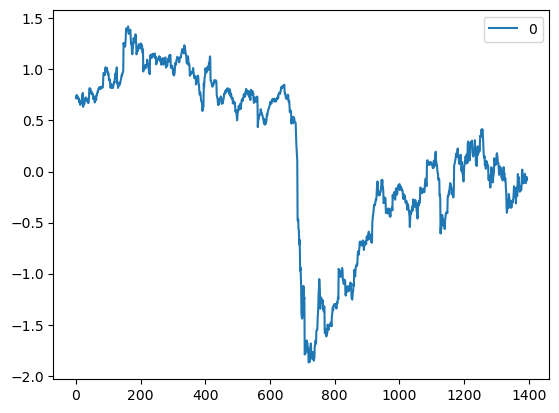

In [122]:
# looking at the prediction
Pred_total_data_df = pd.DataFrame(pred_test_ridge)
Pred_total_data_df.plot()

In [123]:
df_plot_data =y_test.copy() 

In [124]:
#build the datafram to plot the data
df_plot_data["pred"] = pred_test_ridge
df_plot_data.head()

,Jets,pred
Date,,
2017-06-08,0.973018,0.718211
2017-06-09,0.943821,0.743525
2017-06-12,0.899166,0.739165
2017-06-13,0.914623,0.747681
2017-06-14,0.907754,0.739004


<AxesSubplot:xlabel='Date'>

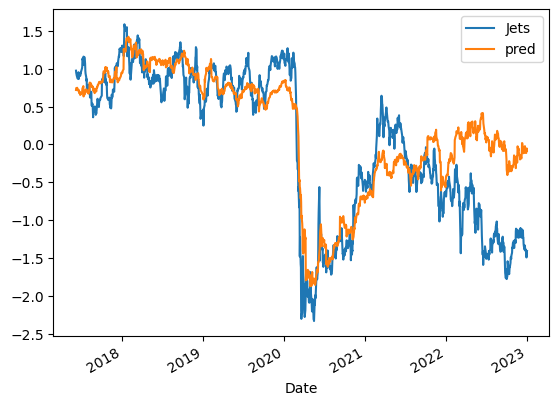

In [125]:
#ploting the prediciton 
df_plot_data.plot()